## Performance test suite

It would be really nice to be able to leave my code running overnight and wake up to a bunch of new data to explore. Some of the figures in my paper require hours of computation to make.

This shouldn't be too difficult. I just need to write to a CSV after each computation. This should be done incrementally so I never need to worry about a single failure resulting in loss of the entire file.

What should the columns be?

    date note rep nl nb nr nt tt mlt alloc gc

Number of lines, buses, wind sites, time steps. Total computation time, mean line time, total allocation, time in garbage collection.

I wrote two scripts (included in this notebook) that perform scaling analysis on the RTS-96 and Polish networks. These scripts are meant to be run in the terminal, without the overhead of the Jupyter notebook and Chrome. The Polish grid one would take many hours to run in its entirety, so I have it write to CSV after each temporal instanton analysis to ensure I get at least some of the data.

## Data analysis

The scaling anlysis output is stored in CSV files, which are easily imported as DataFrames.

In [1]:
using Gadfly
using DataFrames
fname = "rts96_scaling.csv"
dfr = readtable("../data/$fname",header=true)
fname = "polish_scaling.csv"
dfp = readtable("../data/$fname",header=true)

,date,note,rep,nl,nb,nr,nt,tt,mlt,alloc,gc
1,2015-12-08,polish scaling,1,2896,2383,50,6,6.113457131,0.43687593715000006,385575368,0.083777027
2,2015-12-08,polish scaling,1,2896,2383,150,6,16.838591791,1.5022401708,387736728,0.068940206
3,2015-12-08,polish scaling,1,2896,2383,250,6,31.858276329,3.0049852860999997,392777592,0.082107374
4,2015-12-08,polish scaling,1,2896,2383,350,6,50.628399525,4.79101495175,398045080,0.089684058
5,2015-12-08,polish scaling,1,2896,2383,450,6,73.913690297,7.15446975445,403311896,0.07823238
6,2015-12-08,polish scaling,1,2896,2383,550,6,97.288765058,9.386178007700002,408626008,0.071722883
7,2015-12-08,polish scaling,1,2896,2383,650,6,170.660048669,16.848515171149998,413898440,0.089963148
8,2015-12-08,polish scaling,1,2896,2383,750,6,191.662432449,18.9099898096,419161240,0.072957135
9,2015-12-08,polish scaling,1,2896,2383,850,6,228.639381676,22.436530322750002,424412008,1.706647879
10,2015-12-08,polish scaling,1,2896,2383,950,6,292.939005687,29.058467195299993,429697000,0.086258856


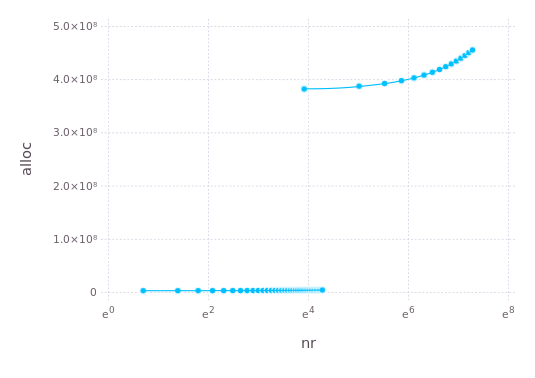

In [6]:
plot(Scale.color_discrete(),Scale.x_log,
layer(dfr,x="nr",y="alloc",
Geom.point,Geom.smooth),
layer(dfp,x="nr",y="alloc",
Geom.point,Geom.smooth))

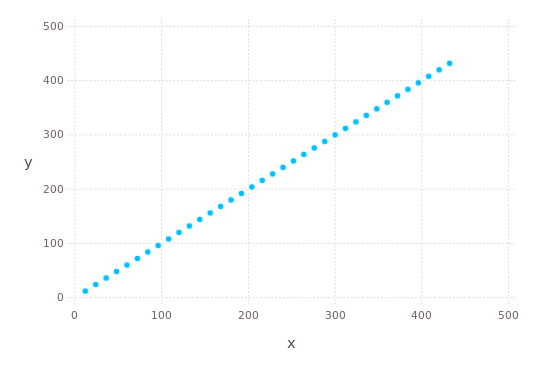

In [17]:
nt = 6
xr = dfr[:nr]*nt
xp = dfp[:nr]*nt

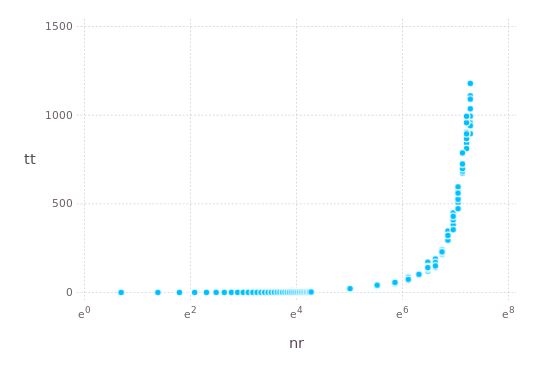

In [13]:
plot(Scale.color_discrete(),Scale.x_log,
layer(dfr,x="nr",y="mlt",
Geom.point),
layer(dfp,x="nr",y="mlt",Geom.point)
)

In [22]:
using MatpowerCases
mpc = loadcase("case2383wp")
mpc["bus"]

 CASE2383WP  Power flow data for Polish system - winter 1999-2000 peak.


2383x13 Array{Float64,2}:
    1.0  1.0   0.0    0.0  0.0  0.0  …   -1.49477  220.0  1.0  1.11  0.95
    2.0  1.0   0.0    0.0  0.0  0.0      -1.01013  220.0  1.0  1.11  0.95
    3.0  1.0   0.0    0.0  0.0  0.0     -26.2082   220.0  1.0  1.11  0.95
    4.0  1.0   0.0    0.0  0.0  0.0      -8.51648  220.0  1.0  1.11  0.95
    5.0  1.0   0.0    0.0  0.0  0.0     -18.9975   220.0  1.0  1.11  0.95
    6.0  1.0   0.0    0.0  0.0  0.0  …  -13.8223   400.0  1.0  1.05  0.95
    7.0  1.0   0.0    0.0  0.0  0.0     -21.4437   220.0  1.0  1.11  0.95
    8.0  1.0   0.0    0.0  0.0  0.0     -10.3803   400.0  1.0  1.05  0.95
    9.0  1.0   0.0    0.0  0.0  0.0     -16.8761   400.0  1.0  1.05  0.95
   10.0  2.0  12.23   9.0  0.0  0.0     -20.6499   220.0  1.0  1.11  0.95
   11.0  1.0   0.0    0.0  0.0  0.0  …   -7.06414  220.0  1.0  1.11  0.95
   12.0  1.0   0.0    0.0  0.0  0.0     -23.9177   220.0  1.0  1.11  0.95
   13.0  1.0   0.0    0.0  0.0  0.0     -21.4897   220.0  1.0  1.11  0.95
    ⋮       

In [29]:
using PyPlot, DataFrames
PyPlot.svg(true)

fname = "rts96_scaling.csv"
dfr = readtable("../data/$fname",header=true)
fname = "polish_scaling.csv"
dfp = readtable("../data/$fname",header=true)

nt = 6
nbr = 73
nbp = 2383

2383

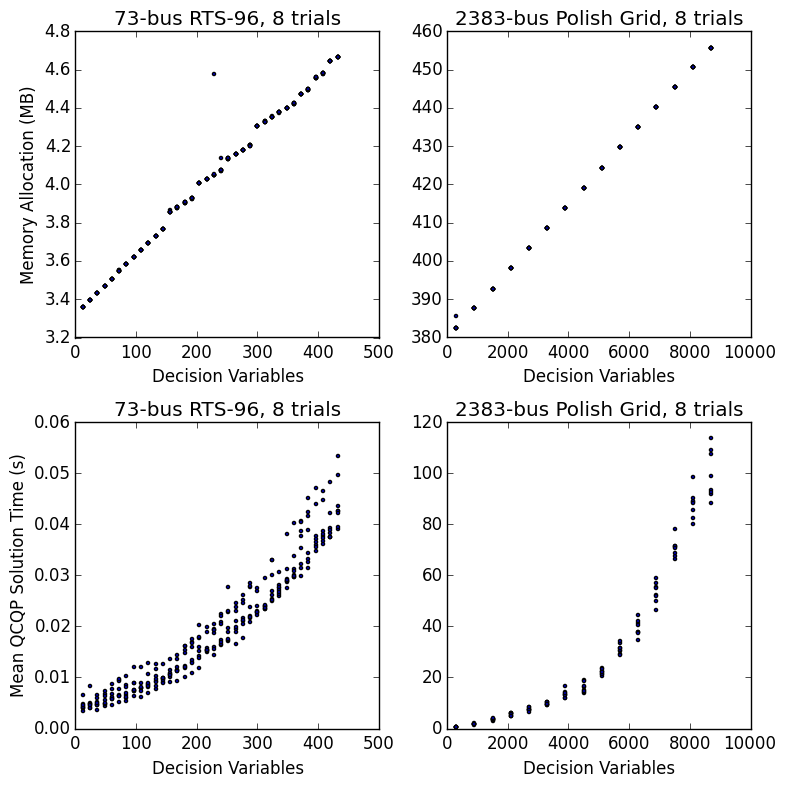

In [38]:
# memory allocation
fig = figure(figsize=(8,8))
subplot(221)
x = dfr[:nr]*nt
y = dfr[:alloc]/1e6
scatter(x,y,marker=".")
axis([0;500;3.2;4.8])
title("73-bus RTS-96, 8 trials")
xlabel("Decision Variables")
ylabel("Memory Allocation (MB)")

subplot(222)
x = dfp[:nr]*nt
y = dfp[:alloc]/1e6
scatter(x,y,marker=".")
axis([0;1e4;380;460])
title("2383-bus Polish Grid, 8 trials")
xlabel("Decision Variables")

# Solution time
# fig = figure(figsize=(10,5))
subplot(223)
x = dfr[:nr]*nt
y = dfr[:mlt]
scatter(x,y,marker=".")
axis([0;500;0;0.06])
title("73-bus RTS-96, 8 trials")
xlabel("Decision Variables")
ylabel("Mean QCQP Solution Time (s)")

subplot(224)
x = dfp[:nr]*nt
y = dfp[:mlt]
scatter(x,y,marker=".")
axis([0;1e4;0;120])
title("2383-bus Polish Grid, 8 trials")
xlabel("Decision Variables")

tight_layout()

In [39]:
df[df[:rep] .> 2,:]

,date,note,rep,nl,nb,nr,nt,tt,mlt,alloc,gc
1,2015-12-08,rts-96 scaling,3,120,73,2,6,0.314938691,0.0045600510420168066,3495552,0.0
2,2015-12-08,rts-96 scaling,3,120,73,4,6,0.27078911,0.0041459059999999995,3529632,0.0
3,2015-12-08,rts-96 scaling,3,120,73,6,6,0.289928831,0.0045282142352941175,3576448,0.0
4,2015-12-08,rts-96 scaling,3,120,73,8,6,0.389394303,0.005972135638655464,3603792,0.0
5,2015-12-08,rts-96 scaling,3,120,73,10,6,0.369887933,0.005669727554621849,3641120,0.003448028
6,2015-12-08,rts-96 scaling,3,120,73,12,6,0.442513644,0.006584383613445378,3684656,0.0
7,2015-12-08,rts-96 scaling,3,120,73,14,6,0.412076368,0.006382298798319329,3719840,0.0
8,2015-12-08,rts-96 scaling,3,120,73,16,6,0.524044378,0.008192568563025209,3756896,0.0
9,2015-12-08,rts-96 scaling,3,120,73,18,6,0.475184257,0.007507904008403361,3792768,0.002922978
10,2015-12-08,rts-96 scaling,3,120,73,20,6,0.595476392,0.009566659411764706,3829632,0.0


## RTS-96 scaling

`rts-96-overnight.jl` (shouldn't actually take a whole night):

In [27]:
addprocs(2) # vary number of concurrent processes here
@everywhere include("../src/TemporalInstanton.jl")
@everywhere include("../src/mat2tmpinst.jl")
@everywhere using TemporalInstanton

date = Dates.format(now(),"yyyy-mm-dd")
case = "case96"
note = "rts-96 scaling"
reps = 10
fname = "rts96_scaling.csv"

i = testcase("timing")
# compile everything
solve_temporal_instanton(i,silent=true)

open("../data/$fname","w") do f
    # header
    writecsv(f,["date";"note";"rep";"nl";"nb";
        "nr";"nt";"tt";"mlt";"alloc";"gc"]')
end
    
# rts-96 scaling
for rep in 1:reps
    num_farms_vec = collect(2:2:72)
    for i in 1:length(num_farms_vec)
        num_farms = num_farms_vec[i]
        penetration = 0.7
        d = mat2tmpinst(case,num_farms,penetration,fill_default=true)
        nl = length(d.lines)
        nb = length(d.k)
        nr = length(d.Ridx)
        nt = round(Int64,length(d.D0)/nb)

        t = @timed solve_temporal_instanton(d,silent=true)
        tt = t[2]
        mlt = mean(t[1].linetimes)
        alloc = t[3]
        gc = t[4]
        open("../data/$fname","a") do f
            writecsv(f,[date note rep nl nb nr nt tt mlt alloc gc])
        end
    end
end

## Polish grid scaling

`polish-overnight.jl`:

In [2]:
addprocs(2) # vary number of concurrent processes here
@everywhere include("../src/TemporalInstanton.jl")
@everywhere include("../src/mat2tmpinst.jl")
@everywhere using TemporalInstanton

date = Dates.format(now(),"yyyy-mm-dd")
case = "case2383wp"
note = "polish scaling"
reps = 10
fname = "polish_scaling.csv"

i = testcase("timing")
# compile everything
solve_temporal_instanton(i,silent=true)

open("../data/$fname","w") do f
    writecsv(f,["date";"note";"rep";"nl";"nb";
        "nr";"nt";"tt";"mlt";"alloc";"gc"]')
end

# polish scaling
for rep in 1:reps
    # larger than 1500 gets shaky on my laptop.
    # (tons of gc, each analysis takes over an hour)
    num_farms_vec = collect(50:100:1500)
    for i in 1:length(num_farms_vec)
        num_farms = num_farms_vec[i]
        penetration = 0.7
        d = mat2tmpinst(case,num_farms,penetration,fill_default=true)
        nl = length(d.lines)
        nb = length(d.k)
        nr = length(d.Ridx)
        nt = round(Int64,length(d.D0)/nb)

        t = @timed solve_temporal_instanton(d,maxlines = 20,silent=true)
        tt = t[2]
        mlt = mean(t[1].linetimes)
        alloc = t[3]
        gc = t[4]
        open("../data/$fname","a") do f
            writecsv(f,[date note rep nl nb nr nt tt mlt alloc gc])
        end
    end
end    

Worker 3 terminated.
ERROR (unhandled task failure): ProcessExitedException()
 in yieldto at ./task.jl:71
 in wait at ./task.jl:371
 in wait at ./task.jl:286
 in wait at ./channels.jl:93
 in take! at ./channels.jl:82
 in take! at ./multi.jl:804
 in remotecall_fetch at multi.jl:730
 in remotecall_fetch at multi.jl:735
 in anonymous at multi.jl:1501
ERROR (unhandled task failure): EOFError: read end of file


LoadError: LoadError: ProcessExitedException()
while loading In[2], in expression starting on line 16